In [1]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../../data/sentiment_analysis_predictions/by_day/AMC.csv", parse_dates=["created_at"])
df.set_index("created_at", drop=True, inplace=True)

In [2]:
data = yf.download("AMC", start="2021-05-02", end="2022-05-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
data["return"] = data["Adj Close"].pct_change()
data["log_return"] = np.log(data["Adj Close"]) - np.log(data["Adj Close"].shift(1))

In [9]:
data.index.to_list()


[Timestamp('2021-05-04 00:00:00'),
 Timestamp('2021-05-05 00:00:00'),
 Timestamp('2021-05-06 00:00:00'),
 Timestamp('2021-05-07 00:00:00'),
 Timestamp('2021-05-10 00:00:00'),
 Timestamp('2021-05-11 00:00:00'),
 Timestamp('2021-05-12 00:00:00'),
 Timestamp('2021-05-13 00:00:00'),
 Timestamp('2021-05-14 00:00:00'),
 Timestamp('2021-05-17 00:00:00'),
 Timestamp('2021-05-18 00:00:00'),
 Timestamp('2021-05-19 00:00:00'),
 Timestamp('2021-05-20 00:00:00'),
 Timestamp('2021-05-21 00:00:00'),
 Timestamp('2021-05-24 00:00:00'),
 Timestamp('2021-05-25 00:00:00'),
 Timestamp('2021-05-26 00:00:00'),
 Timestamp('2021-05-27 00:00:00'),
 Timestamp('2021-05-28 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-06-02 00:00:00'),
 Timestamp('2021-06-03 00:00:00'),
 Timestamp('2021-06-04 00:00:00'),
 Timestamp('2021-06-07 00:00:00'),
 Timestamp('2021-06-08 00:00:00'),
 Timestamp('2021-06-09 00:00:00'),
 Timestamp('2021-06-10 00:00:00'),
 Timestamp('2021-06-11 00:00:00'),
 Timestamp('2021-06-

In [7]:
data

,Open,High,Low,Close,Adj Close,Volume,return,log_return
Date,,,,,,,,
2021-05-04,9.630000,9.750000,9.050000,9.390000,9.390000,35222400,-0.032956,-0.033511
2021-05-05,9.410000,9.570000,9.080000,9.170000,9.170000,27608700,-0.023429,-0.023708
2021-05-06,9.330000,9.400000,8.930000,9.000000,9.000000,39586300,-0.018539,-0.018713
2021-05-07,9.320000,9.790000,9.140000,9.510000,9.510000,38245000,0.056667,0.055119
2021-05-10,9.900000,10.150000,9.560000,9.740000,9.740000,41015300,0.024185,0.023897
...,...,...,...,...,...,...,...,...
2022-04-25,16.389999,17.030001,16.290001,16.959999,16.959999,26444200,0.026634,0.026286
2022-04-26,16.889999,17.090000,15.490000,15.500000,15.500000,24732800,-0.086085,-0.090018
2022-04-27,15.390000,16.250000,15.250000,15.850000,15.850000,26605900,0.022581,0.022330


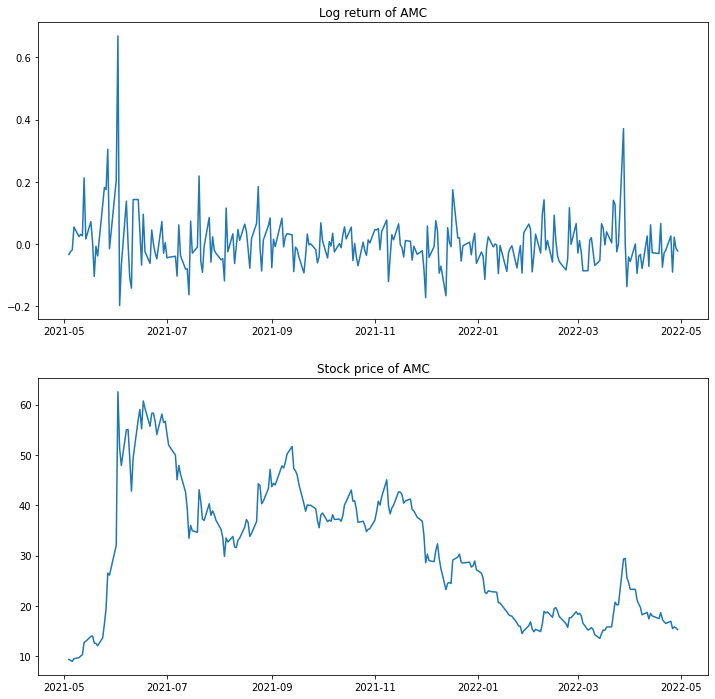

In [10]:
fig, axs = plt.subplots(2)

axs[0].plot(data.index.to_list() ,data["log_return"])
axs[0].set_title("Log return of AMC")
axs[1].plot(data.index.to_list(), data["Adj Close"])
axs[1].set_title("Stock price of AMC")
fig.set_figheight(12)
fig.set_figwidth(12)


plt.show()

[]

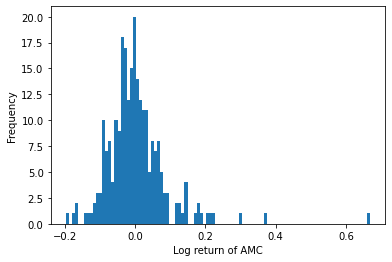

In [15]:
data["log_return"].plot(kind="hist", bins=100)
plt.xlabel("Log return of AMC")
plt.plot()

In [5]:
df_merged = pd.merge(df,data, how='inner', left_index=True, right_index=True)

In [6]:
#df_merged["prev_adj_close"] = df_merged["Adj Close"].shift(1)

## 3. Calculating Returns

In [7]:
# Return in percent
df_merged["return"] = df_merged["Adj Close"].pct_change()

In [8]:
df_merged["log_return"] = np.log(df_merged["Adj Close"]) - np.log(df_merged["Adj Close"].shift(1))

In [9]:
df_merged["log_return_shift"] = df_merged["log_return"].shift(-1)

In [10]:
df_merged["pos_minus_neg_diff"] = df_merged["pos_minus_neg"].diff(1)

In [11]:
df_merged["count_diff"] = df_merged["count"].diff(1)

In [12]:
df_merged.dropna(inplace=True)

In [13]:
df_merged

,Negative,Neutral,Positive,count,pos_minus_neg,pos_minus_neg_times_count,Open,High,Low,Close,Adj Close,Volume,return,log_return,log_return_shift,pos_minus_neg_diff,count_diff
2021-05-04,0.324312,0.219098,0.456590,124,0.132277,16.402389,9.630000,9.750000,9.050000,9.390000,9.390000,35222400,-0.032956,-0.033511,-0.023708,-0.139480,-7.0
2021-05-05,0.204789,0.349033,0.446178,257,0.241389,62.036886,9.410000,9.570000,9.080000,9.170000,9.170000,27608700,-0.023429,-0.023708,-0.018713,0.109111,133.0
2021-05-06,0.238258,0.343585,0.418157,519,0.179900,93.367912,9.330000,9.400000,8.930000,9.000000,9.000000,39586300,-0.018539,-0.018713,0.055119,-0.061489,262.0
2021-05-07,0.211977,0.340285,0.447738,323,0.235762,76.150988,9.320000,9.790000,9.140000,9.510000,9.510000,38245000,0.056667,0.055119,0.023897,0.055862,-196.0
2021-05-10,0.235655,0.315471,0.448873,281,0.213218,59.914264,9.900000,10.150000,9.560000,9.740000,9.740000,41015300,0.024185,0.023897,0.031332,-0.022544,-42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-22,0.320121,0.381434,0.298444,35,-0.021677,-0.758702,17.120001,17.610001,16.100000,16.520000,16.520000,26431700,-0.019585,-0.019779,0.026286,0.000643,-19.0
2022-04-25,0.151190,0.421520,0.427291,68,0.276101,18.774880,16.389999,17.030001,16.290001,16.959999,16.959999,26444200,0.026634,0.026286,-0.090018,0.297778,33.0
2022-04-26,0.480377,0.361146,0.158477,46,-0.321900,-14.807422,16.889999,17.090000,15.490000,15.500000,15.500000,24732800,-0.086085,-0.090018,0.022330,-0.598002,-22.0
2022-04-27,0.318885,0.384888,0.296227,44,-0.022657,-0.996929,15.390000,16.250000,15.250000,15.850000,15.850000,26605900,0.022581,0.022330,-0.013338,0.299243,-2.0


In [16]:
df_merged.to_csv("stock_prediction_data_AMC.csv")

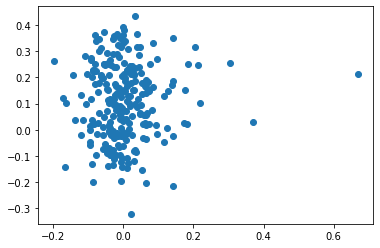

In [32]:
plt.scatter(df_merged["log_return_shift"], df_merged["pos_minus_neg"])
plt.show()

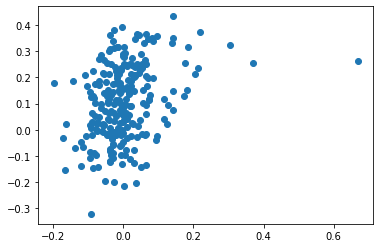

In [33]:
plt.scatter(df_merged["log_return"], df_merged["pos_minus_neg"])
plt.show()

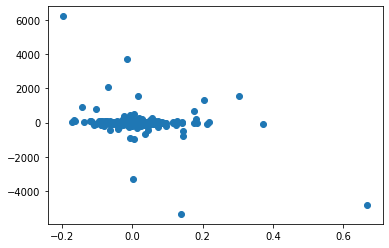

In [34]:
plt.scatter(df_merged["log_return_shift"], df_merged["count_diff"])
plt.show()

In [35]:
pos_minus_neg_log_return = stats.pearsonr(df_merged["log_return"], df_merged["pos_minus_neg"])
pos_minus_neg_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["pos_minus_neg"])

count_log_return = stats.pearsonr(df_merged["log_return"], df_merged["count"])
count_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["count"])

pos_minus_neg_times_count_log_return = stats.pearsonr(df_merged["log_return"], df_merged["pos_minus_neg_times_count"])
pos_minus_neg_times_count_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["pos_minus_neg_times_count"])

Positive_log_return = stats.pearsonr(df_merged["log_return"], df_merged["Positive"])
Positive_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["Positive"])

Negative_log_return = stats.pearsonr(df_merged["log_return"], df_merged["Negative"])
Negative_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["Negative"])

pos_minus_neg_diff_log_return = stats.pearsonr(df_merged["log_return"], df_merged["pos_minus_neg_diff"])
pos_minus_neg_diff_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["pos_minus_neg_diff"])

count_diff_log_return = stats.pearsonr(df_merged["log_return"], df_merged["count_diff"])
count_diff_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["count_diff"])

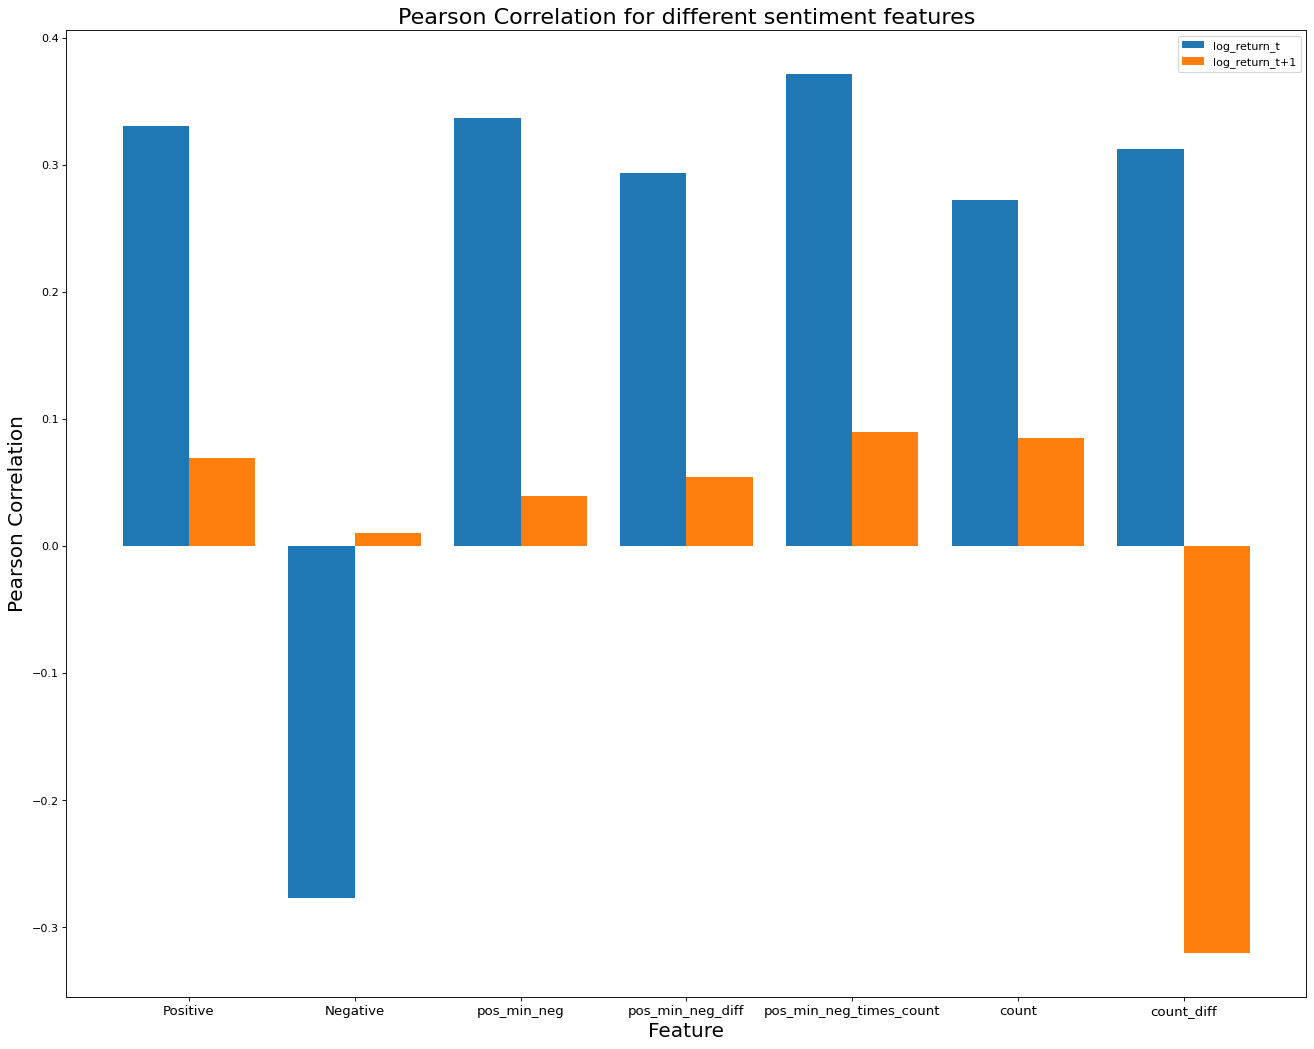

In [36]:
plt.figure(figsize=(20, 16), dpi=80)

X = ['Positive','Negative','pos_min_neg','pos_min_neg_diff', "pos_min_neg_times_count", "count", "count_diff"]
Y_log_return= [Positive_log_return[0],Negative_log_return[0],pos_minus_neg_log_return[0],pos_minus_neg_diff_log_return[0], pos_minus_neg_times_count_log_return[0], count_log_return[0], count_diff_log_return[0]]
Z_log_return_shift = [Positive_log_return_shift[0],Negative_log_return_shift[0],pos_minus_neg_log_return_shift[0],pos_minus_neg_diff_log_return_shift[0], pos_minus_neg_times_count_log_return_shift[0], count_log_return_shift[0], count_diff_log_return_shift[0]]

X_axis = np.arange(len(X))

plt.bar(X_axis -0.2, Y_log_return, 0.4,  label = 'log_return_t')
plt.bar(X_axis +0.2, Z_log_return_shift, 0.4, label = 'log_return_t+1')

plt.xticks(X_axis, X, size=12)
plt.xlabel("Feature", size=18)
plt.ylabel("Pearson Correlation", size=18)
plt.title("Pearson Correlation for different sentiment features", size=20)
plt.legend()
plt.show()

In [37]:
Y_log_return_1= [Positive_log_return[1],
                 Negative_log_return[1],
                 pos_minus_neg_log_return[1],pos_minus_neg_diff_log_return[1], pos_minus_neg_times_count_log_return[1], count_log_return[1],
                 count_diff_log_return[1]]

In [38]:
Y_log_return_1

[8.816187487613529e-08,
 9.062748687973934e-06,
 4.816683062357354e-08,
 2.3457654741198983e-06,
 1.3584395539372879e-09,
 1.2650196866834193e-05,
 4.704936054321467e-07]

In [39]:
Z_log_return_shift = [Positive_log_return_shift[1],
                      Negative_log_return_shift[1],pos_minus_neg_log_return_shift[1],pos_minus_neg_diff_log_return_shift[1], pos_minus_neg_times_count_log_return_shift[1], count_log_return_shift[1], count_diff_log_return_shift[1]]

In [40]:
Z_log_return_shift

[0.2771129430540403,
 0.8733418194176211,
 0.5345699112084484,
 0.3917793346729439,
 0.1560327224571128,
 0.1780984236460395,
 2.3119063183836728e-07]

In [50]:
df_excel = pd.DataFrame(data={"Feature": X, "Log_return_t": Y_log_return, "Log_return_t+1": Z_log_return_shift})

In [55]:
df_excel.to_excel("corr_results_AMC.xlsx")

In [54]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Feature         7 non-null      object 
 1   Log_return_t    7 non-null      float64
 2   Log_return_t+1  7 non-null      float64
dtypes: float64(2), object(1)
memory usage: 296.0+ bytes


<AxesSubplot:>

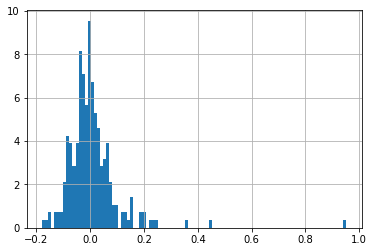

In [14]:
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=df_excel)

## 4. Descriptive and inferential statistics

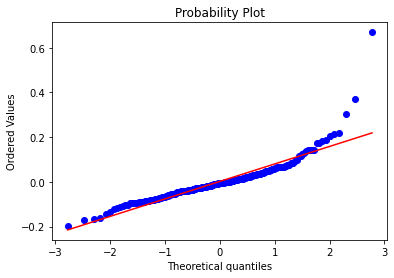

In [15]:
stats.probplot(df_merged["log_return"].dropna(), dist="norm", plot=plt)
plt.show()

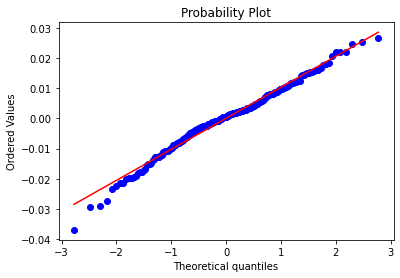

In [68]:
stats.probplot(df_merged["return"].dropna(), dist="norm", plot=plt)
plt.show()

In [60]:
np.e**1.38629

3.999982555558476

<AxesSubplot:>

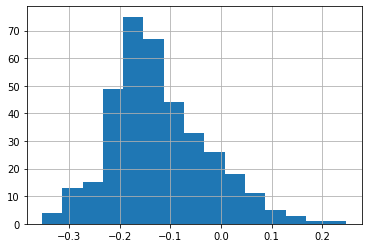

In [12]:
df["pos_minus_neg"].hist(bins=15, )